In [1]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

In [48]:
# 상위 x가지 키워드로 워드클라우드 생성하는 함수 생성
def WC_maker(df, x = None): # 데이터 프레임 및 count 갯수 지정
    # df : 1행은 워드클라우드로 보여줄 단어, 2행은 단어의 빈도수로 구성된 데이터 프레임
    # x : 워드클라우드로 나타낼 상위 x개 데이터
    if x == None:
        data = dict(zip(df.iloc[:,0].tolist(), df.iloc[:,1].tolist()))
    else: 
        data = dict(zip(df.iloc[:,0].head(x).tolist(), df.iloc[:,1].head(x).tolist())) 

    data
    wc = WordCloud(font_path ='C:/Windows/Fonts/Hancom Gothic Regular.ttf',            #폰트 
                background_color='white',                              #배경색
                width=800, height=600 ,                                #사이즈설정
                max_words=200)                                         #단어갯수

    cloud = wc.generate_from_frequencies(data)                            #사전형태 데이터

    plt.figure(figsize=(10,10))                                           #프레임 사이즈설정
    plt.axis('off')                                                       #테두리 선 없애기
    plt.imshow(cloud,interpolation="bilinear")

In [3]:
df_DE_Key = pd.read_csv("C:\Data_Engineer_Study\멀캠_PJT_2\multi_finalproject\data\prefer_DE.csv", encoding = "ANSI")
df_DA_Key = pd.read_csv("C:\Data_Engineer_Study\멀캠_PJT_2\multi_finalproject\data\prefer_DA.csv", encoding = "ANSI")
df_SC_Key = pd.read_csv("C:\Data_Engineer_Study\멀캠_PJT_2\multi_finalproject\data\prefer_SC.csv", encoding = "ANSI")

- 데이터 엔지니어 워드클라우드

In [4]:
df_DE_Key

,prefer,count
0,경험,402
1,데이터,133
2,개발,110
3,관련,104
4,보유,83
...,...,...
1197,사진,1
1198,사학,1
1199,산업기능요원,1
1200,산업보안,1


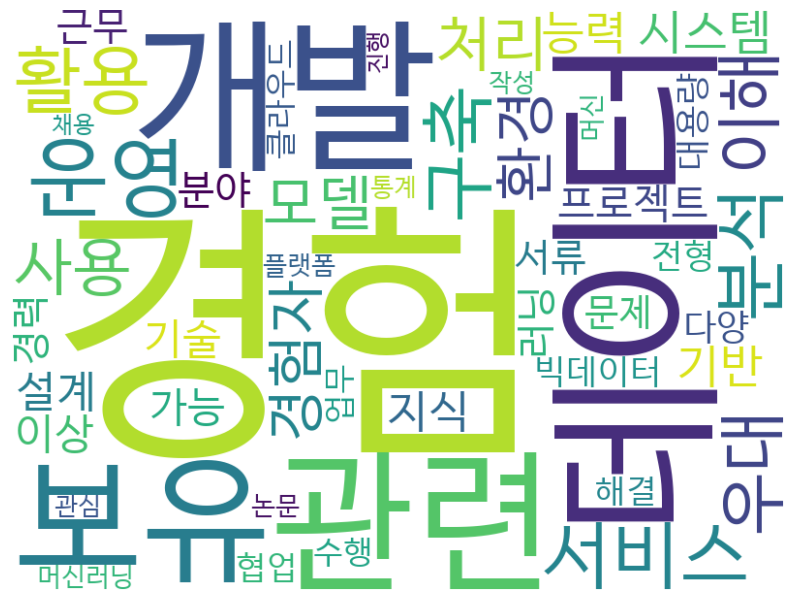

In [51]:
WC_maker(df_DE_Key,50) # 상위 50개 출력

- 데이터 분석가 워드클라우드

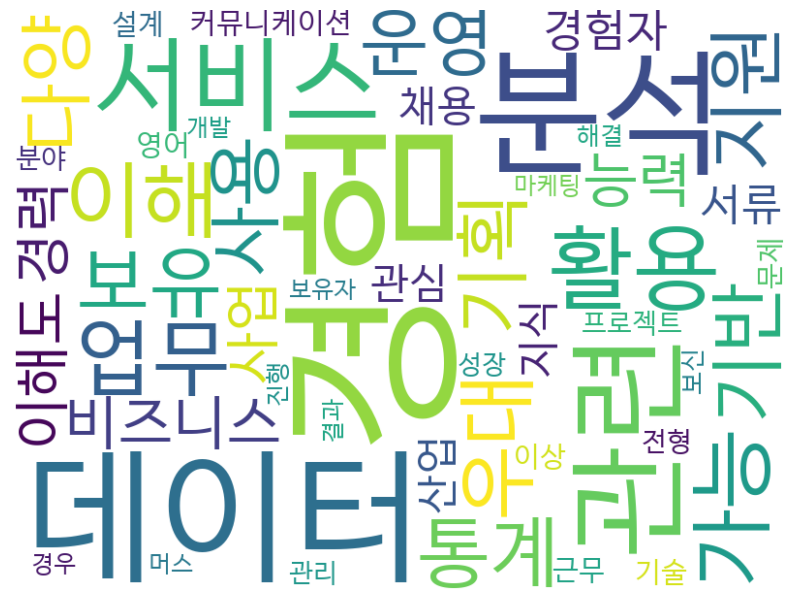

In [52]:
WC_maker(df_DA_Key, 50) # 상위 50개 출력

- 데이터 사이언티스트 워드클라우드

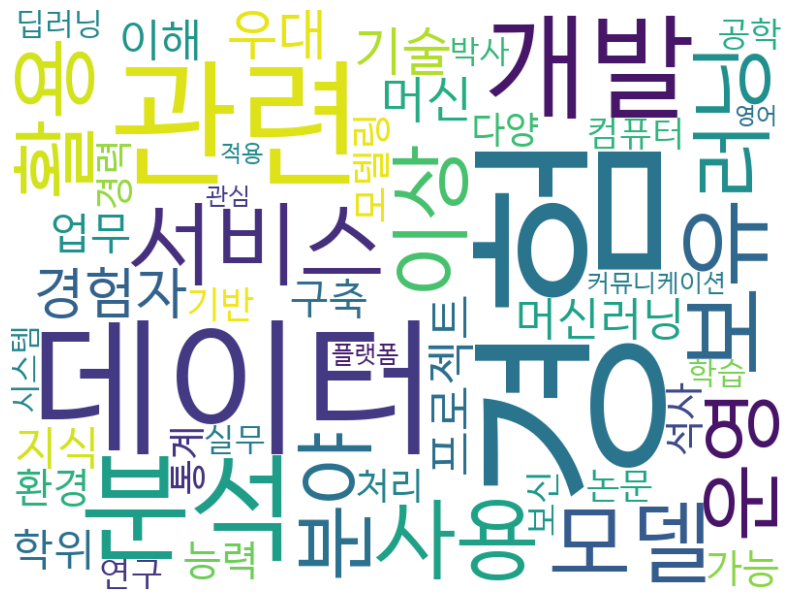

In [53]:
WC_maker(df_SC_Key, 50) # 상위 50개 출력

- 겹치는 데이터, 우대, 관련, 가능, 기반...과 같이 표현이 애매한 단어 제거

In [54]:
remove_word = ['데이터', '우대', '관련', '가능', '기반', '업무', '보신', '이상', '전형', '머신', 
               '경우', '진행', '경험자', '근무', '적용', '지원', '러닝', '분야', '작성', '업무',
               '보신', '결과', '서류', '다양', '채용', '사용', '활용', '이해', '모델', '보유', 
               '머스', '능력', '환경', '산업', '사업', '경력', '관심', '경험', '분석']

In [55]:
for i in remove_word:
    df_DE_Key = df_DE_Key[~df_DE_Key['prefer'].str.contains(i)]
    df_DA_Key = df_DA_Key[~df_DA_Key['prefer'].str.contains(i)]
    df_SC_Key = df_SC_Key[~df_SC_Key['prefer'].str.contains(i)]

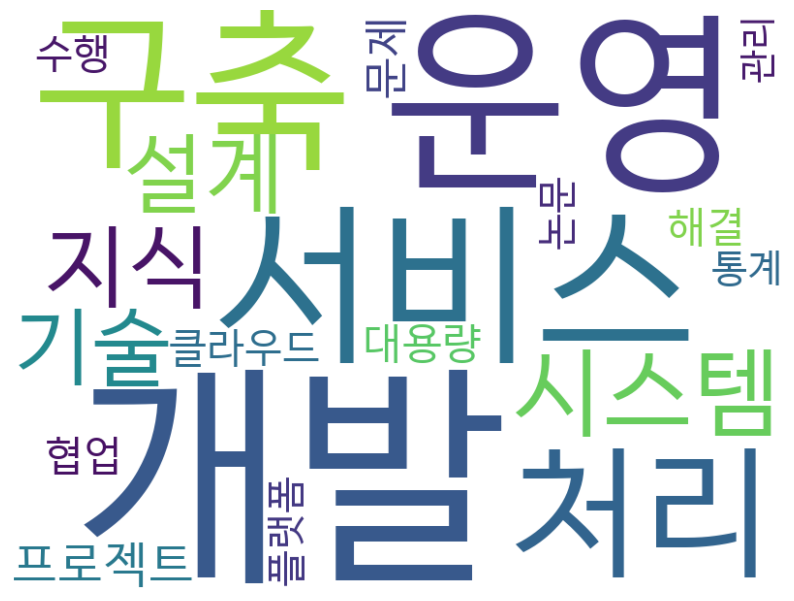

In [56]:
WC_maker(df_DE_Key, 20) # 상위 10개 출력

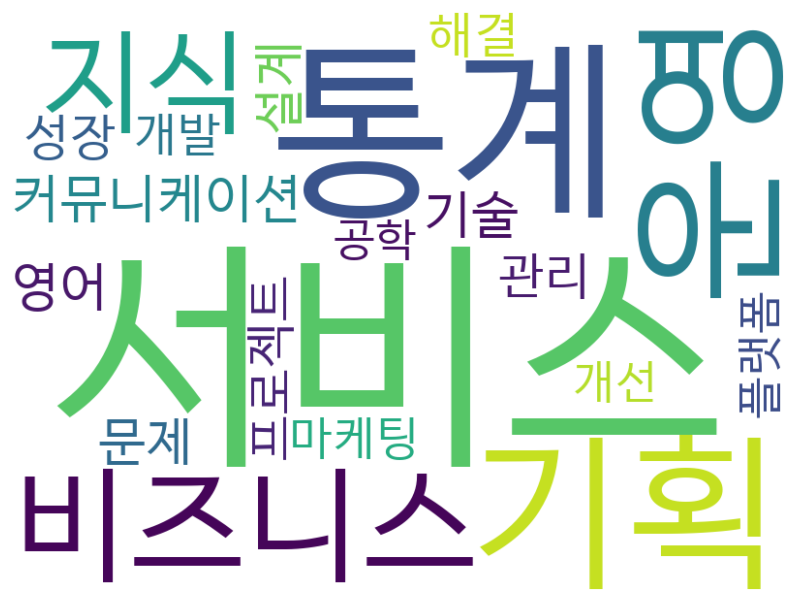

In [57]:
WC_maker(df_DA_Key, 20) # 상위 10개 출력

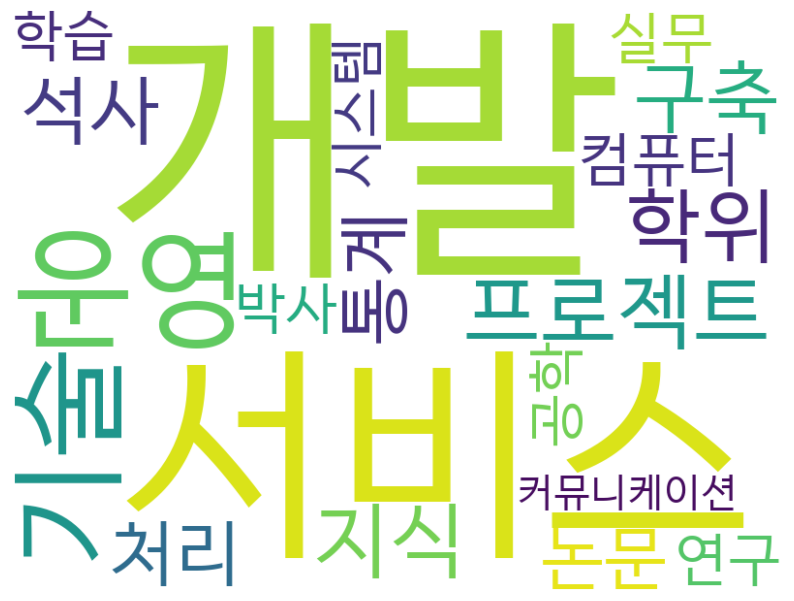

In [58]:
WC_maker(df_SC_Key, 20) # 상위 10개 출력

In [59]:
df_DE_Key.head(20).reset_index(drop = True)

,prefer,count
0,개발,110
1,운영,71
2,서비스,56
3,구축,55
4,처리,37
5,시스템,35
6,지식,31
7,설계,30
8,기술,28
9,프로젝트,27


In [60]:
df_DA_Key.head(20).reset_index(drop = True)

,prefer,count
0,서비스,72
1,통계,41
2,기획,40
3,운영,36
4,비즈니스,36
5,지식,28
6,커뮤니케이션,27
7,영어,27
8,설계,26
9,문제,26


In [61]:
df_SC_Key.head(20).reset_index(drop = True)

,prefer,count
0,개발,118
1,서비스,73
2,운영,59
3,기술,50
4,프로젝트,44
5,지식,44
6,학위,42
7,구축,39
8,석사,36
9,통계,34


---

# TOOL 워드클라우드 시각화

- 데이터 엔지니어

In [62]:
df_DE_tool = pd.read_csv("C:\Data_Engineer_Study\멀캠_PJT_2\Crolling_wanted\multi_finalproject\data\\tool_DE.csv", encoding = "ANSI")
df_AN_tool = pd.read_csv("C:\Data_Engineer_Study\멀캠_PJT_2\Crolling_wanted\multi_finalproject\data\\tool_AN.csv", encoding = "ANSI")
df_SCI_tool = pd.read_csv("C:\Data_Engineer_Study\멀캠_PJT_2\Crolling_wanted\multi_finalproject\data\\tool_SC.csv", encoding = "ANSI")

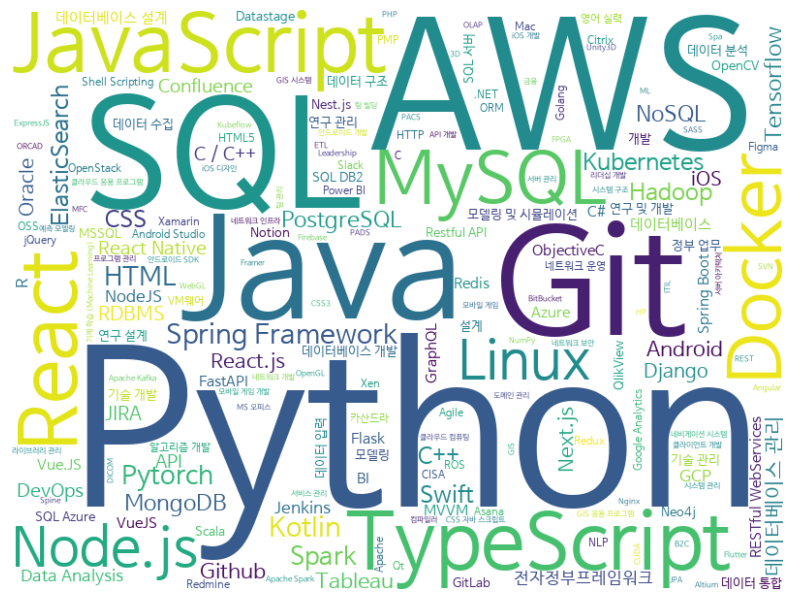

In [63]:
WC_maker(df_DE_tool)

In [64]:
df_DE_tool.head(20)

,tool,count
0,Python,65
1,AWS,42
2,SQL,29
3,Git,28
4,Java,25
5,JavaScript,24
6,React,23
7,TypeScript,23
8,MySQL,21
9,Docker,21


- 데이터 분석가

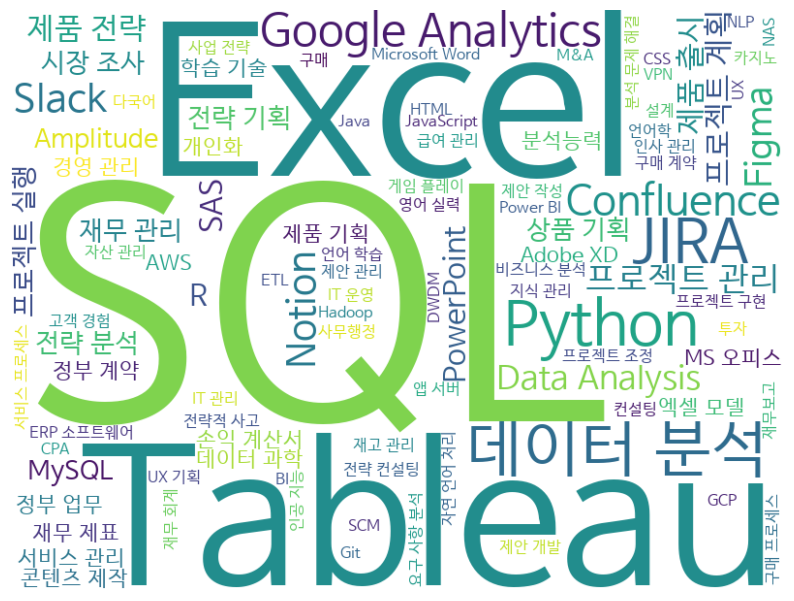

In [65]:
WC_maker(df_AN_tool)

In [66]:
df_AN_tool.head(20)

,tool,count
0,SQL,21
1,Excel,12
2,Tableau,10
3,데이터 분석,10
4,Python,10
5,JIRA,10
6,Google Analytics,9
7,Confluence,8
8,Slack,7
9,Notion,7


- 데이터 사이언티스트

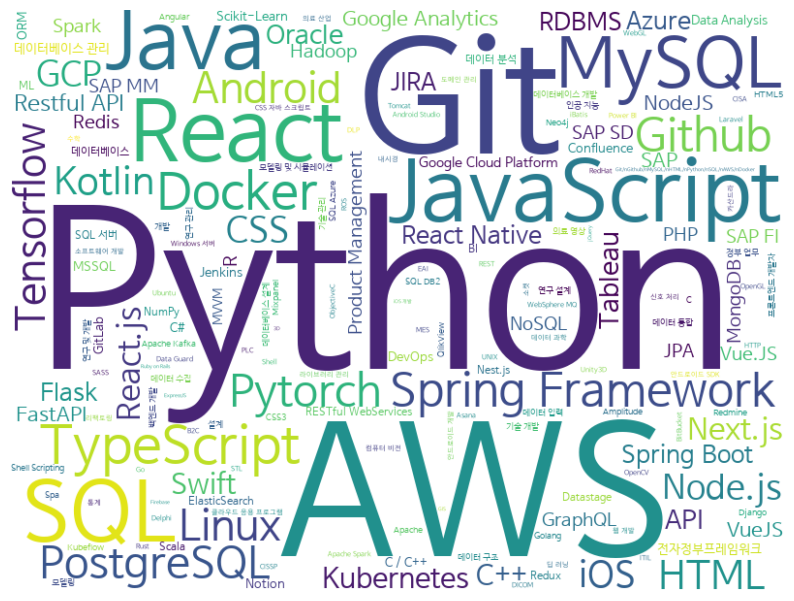

In [67]:
WC_maker(df_SCI_tool)

In [68]:
df_SCI_tool.head(20)

,tool,count
0,Python,95
1,AWS,63
2,Git,45
3,JavaScript,37
4,React,37
5,SQL,36
6,Java,33
7,MySQL,29
8,TypeScript,29
9,Docker,26


## 상위 10개만 출력
- 데이터 엔지니어, 사이언티스트의 워드클라우드가 유사하여 분별력 x

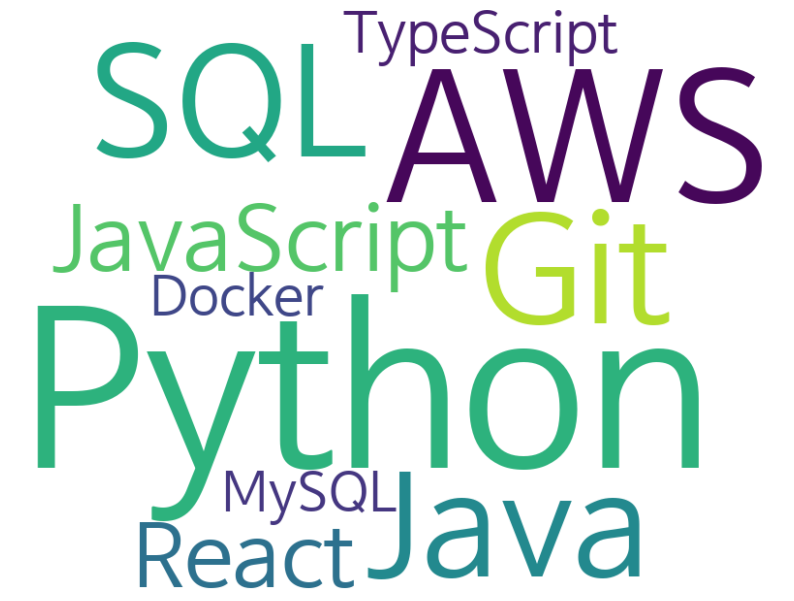

In [69]:
WC_maker(df_DE_tool, 10)

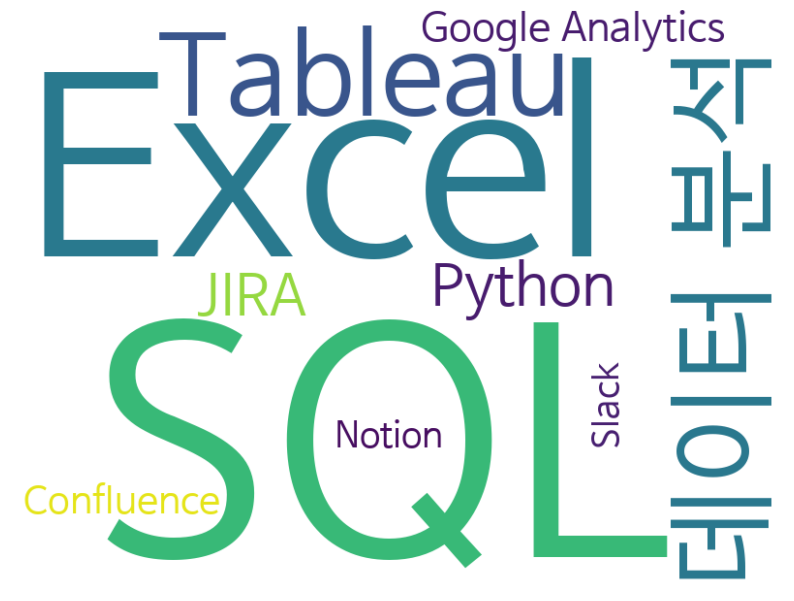

In [70]:
WC_maker(df_AN_tool, 10)

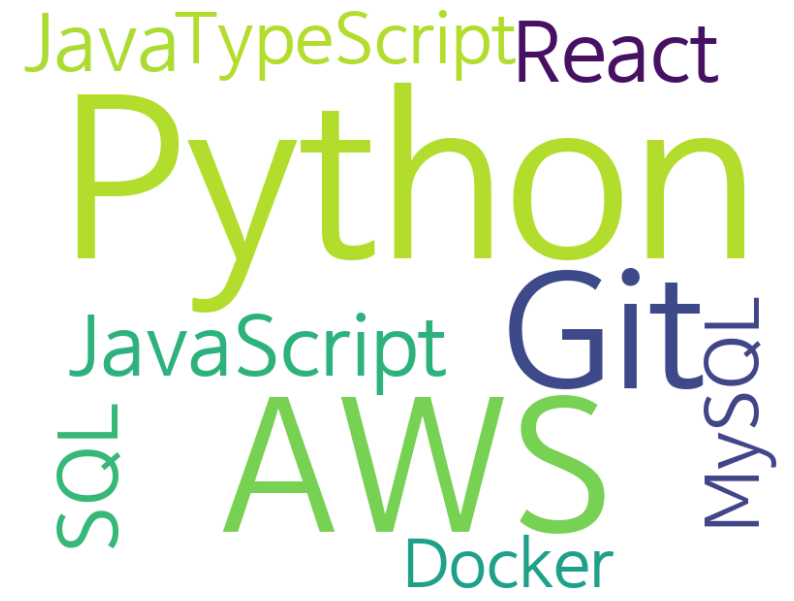

In [71]:
WC_maker(df_SCI_tool, 10)